IS 675: Data Mining
Summer 2019
## Homework Assignment 5 (Due July, 14 2019, midnight EST)



1. Load the diamonds dataset attached to this assignment. (10)
2. Create a multinomial logistic regression model with price as the target variable and carat and depth as the predicting variables. Note that you have to encode the discrete variables as before. The attribute price is continuous, so you need to first discretize it and then encode the discretized values. (30 points)
3. Plot the decision boundaries for the three classes of diamonds. (10 points)
4. Load the wine dataset. (10 points)
5. Create a multinomial logistic regression model for the wine dataset with class as the target attribute. Select the best two predicting attributes for the model. [Hint:  look up `sklearn.feature_selection`.] (30 points)
6. Plot the decision boundaries for the three classes of wines. (10 points)


In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, model_selection
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

## 1. Load the diamonds dataset attached to this assignment. (10)

In [2]:
diamonds = pd.read_csv('diamonds.csv')
diamonds.head()

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335


## 2. Create a multinomial logistic regression model 
with price as the target variable and carat and depth as the predicting variables. 

Note that you have to encode the discrete variables as before. The attribute price is continuous, so you need to first discretize it and then encode the discretized values. (30 points)


In [3]:
print('Encoding discrete variables')
label_encoder = preprocessing.LabelEncoder()
carrot_encoded = label_encoder.fit_transform(diamonds['carat'])
depth_encoded = label_encoder.fit_transform(diamonds['depth'])

diamonds['carat'] = carrot_encoded
diamonds['depth'] = depth_encoded

diamonds = diamonds.drop('cut', 1)\
                   .drop('color', 1)\
                   .drop('clarity', 1)\
                   .drop('table', 1)

diamonds.head()

Encoding discrete variables


,carat,depth,price
0,3,83,326
1,1,66,326
2,3,37,327
3,9,92,334
4,11,101,335


In [4]:
print('Discretizing price')
price_descretized = pd.qcut(diamonds['price'], 3, labels=['low', 'medium', 'high'])
diamonds['price'] = price_descretized
diamonds.head()

Discretizing price


,carat,depth,price
0,3,83,low
1,1,66,low
2,3,37,low
3,9,92,low
4,11,101,low


In [5]:
print('Encoding price')
price_encoded = label_encoder.fit_transform(diamonds['price'])
diamonds['price'] = price_encoded
diamonds.describe()

Encoding price


,carat,depth,price
count,53940.000000,53940.000000,53940.000000
mean,59.757008,85.497386,0.999703
std,47.209045,14.201771,0.816322
min,0.000000,0.000000,0.000000
25%,20.000000,78.000000,0.000000
50%,50.000000,86.000000,1.000000
75%,84.000000,93.000000,2.000000
max,272.000000,183.000000,2.000000


In [6]:
print('Multinominal Logistic Model')
logistic_model = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial', max_iter=1000)
diamonds = diamonds.drop('price', 1)
logistic_model.fit(diamonds, price_encoded)
logistic_model

Multinominal Logistic Model


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

## 3. Plot the decision boundaries for the three classes of diamonds. (10 points)

In [7]:
x_min, x_max = diamonds['carat'].min() - .5, diamonds['carat'].max() + .5
y_min, y_max = diamonds['depth'].min() - .5, diamonds['depth'].max() + .5
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                     np.arange(y_min, y_max, h))
z = logistic_model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = z.reshape(xx.shape)

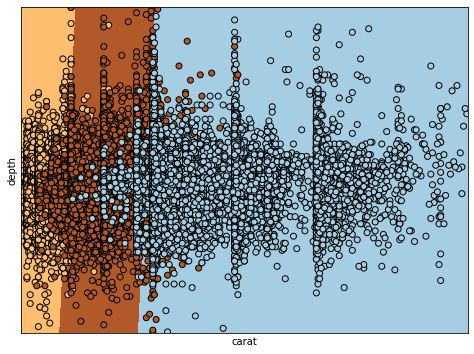

In [8]:
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(diamonds['carat'], diamonds['depth'], c=price_encoded, 
           edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('carat')
plt.ylabel('depth')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

## 4. Load the wine dataset. (10 points)


In [9]:
import sklearn.datasets as datasets
wine_dataset = datasets.load_wine()

# print(wine_dataset.DESCR)
wine_dataset

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

## 5. Create a multinomial logistic regression model for the wine dataset 
with class as the target attribute. Select the best two predicting attributes for the model. [Hint: look up sklearn.feature_selection.] (30 points)


In [10]:
from sklearn.feature_selection import RFE
model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=3000)
rfe = RFE(model, n_features_to_select=2)
fit = rfe.fit(wine_dataset.data, wine_dataset.target)

from itertools import compress
selected_features = list(compress(wine_dataset.feature_names, fit.support_))
print('Selected features: ', selected_features)

Selected features:  ['alcohol', 'flavanoids']


In [11]:
selected_data = wine_dataset.data[:, fit.support_]
model.fit(selected_data, wine_dataset.target)
selected_data[:5]

array([[14.23,  3.06],
       [13.2 ,  2.76],
       [13.16,  3.24],
       [14.37,  3.49],
       [13.24,  2.69]])

## 6. Plot the decision boundaries for the three classes of wines. (10 points)

In [12]:
x_min, x_max = selected_data[0].min() - .5, \
               selected_data[0].max() + .5
y_min, y_max = selected_data[1].min() - .5, \
               selected_data[1].max() + .5
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                     np.arange(y_min, y_max, h))
z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = z.reshape(xx.shape)

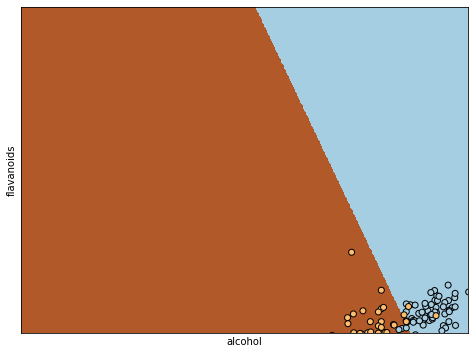

In [13]:
plt.figure(1, figsize=(8,6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(selected_data[:, 0], selected_data[:, 1], c=wine_dataset.target, 
           edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()